<a href="https://colab.research.google.com/github/gabriellycristine1/Projetos_e_Atividades_Python/blob/main/Projeto_Melanoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U efficientnet
import sys
import os
from os.path import join
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import tensorflow as tf
!pip install --user tensorflow-addons==0.8.3
!pip install --user tensorflow==2.2.0-rc3a
from keras.preprocessing.image import load_img, img_to_array
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization
from keras.utils import np_utils #, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0-rc3a (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.0+zzzcolab20220506153740, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.4+zzzcolab20220516125453, 2.6.5, 2.6.5+zzzcolab20220523104206, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.0+zzzcolab20220506150900, 2.7.1, 2.

In [ ]:
import zipfile

In [ ]:
from google.colab.patches import cv2_imshow
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/PROJETO_melanoma.zip'
zip_object = zipfile.ZipFile(file = path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
PATH = "/content/DermMel"

In [ ]:
print('Total Directories')
display(os.listdir(PATH))

Total Directories


['train_sep', 'valid', 'test']

In [ ]:
PATHtrain = "/content/DermMel/train_sep"
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
drs = os.listdir(PATHtrain)
im_len = 0
for label in sorted(drs):
    print(label,len(os.listdir('/content/DermMel/train_sep/Melanoma')))
    im_len = im_len + len(os.listdir('/content/DermMel/train_sep/NotMelanoma'))

print("Total TRAIN photos ", im_len)
print("_"*50)

PATHvalid = '/content/DermMel/valid'
print(len(os.listdir(PATHvalid)), " VALID Directories of photos")
drs = os.listdir(PATHvalid)
im_len = 0
for label in sorted(drs):
    print(label,len(os.listdir('/content/DermMel/valid/Melanoma')))
    im_len = im_len + len(os.listdir('/content/DermMel/valid/NotMelanoma'))

print("Total Validation photos ", im_len)
print("_"*50)

PATHtest ='/content/DermMel/test'
print(len(os.listdir(PATHtest)), " TEST Directories of photos")
drs = os.listdir(PATHtest)
im_len = 0

for label in sorted(drs):
    print(label,len(os.listdir('/content/DermMel/test/Melanoma')))
    im_len = im_len + len(os.listdir('/content/DermMel/test/NotMelanoma'))

print("Total Testing photos ", im_len)
print("_"*50)

2  TRAIN Directories of photos
Melanoma 5341
NotMelanoma 5341
Total TRAIN photos  10682
__________________________________________________
2  VALID Directories of photos
Melanoma 1781
NotMelanoma 1781
Total Validation photos  3562
__________________________________________________
2  TEST Directories of photos
Melanoma 1781
NotMelanoma 1781
Total Testing photos  3560
__________________________________________________


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
import cv2

In [ ]:
from PIL import Image

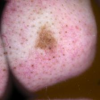

In [ ]:
imagem = cv2.imread('/content/DermMel/train_sep/Melanoma/AUG_0_1013.jpeg')
imagem = cv2.resize(imagem,(100,100),interpolation=cv2.INTER_AREA)
cv2_imshow(imagem)

In [ ]:
def dados_imagem():
  caminhos = [os.path.join('/content/DermMel/train_sep/Melanoma', f) for f in os.listdir('/content/DermMel/train_sep/Melanoma')]
  mela = []
  for caminho in caminhos:
    imagem = cv2.imread(caminho)
    imagem = Image.open(caminho).convert('L')
    mela.append(imagem)
  return mela

In [ ]:
mela = dados_imagem()

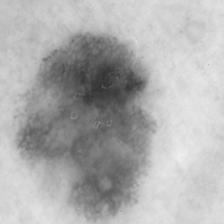

In [ ]:
mela[0]

In [ ]:
from google.colab.patches import cv2

In [ ]:
# # Check the photos and their labels 

# TestNum = 40
# diag1 = 'Melanoma'
# diag2 = 'NotMelanoma'

# # MELANOMA TRAIN
# image_dir = PATHtrain +'/'+diag1+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("TRAIN ",diag1," photo number ", TestNum)
# plt.show()

# # NOTMELANOMA TRAIN
# image_dir = PATHtrain +'/'+diag2+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("TRAIN ",diag2," photo number ", TestNum)
# plt.show()


# #MELANOMA VALID
# image_dir = PATHvalid +'/'+diag1+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("VALID ",diag1," photo number ", TestNum)
# plt.show()

# #NOTMELANOMA VALID
# image_dir = PATHvalid +'/'+diag2+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("VALID ",diag2," photo number ", TestNum)
# plt.show()


# #MELANOMA TEST
# image_dir = PATHtest +'/'+diag1+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("TEST ",diag1," photo number ", TestNum)
# plt.show()

# #NOTMELANOMA TEST
# image_dir = PATHtest +'/'+diag2+'/'
# img_name = os.listdir(image_dir)[TestNum]
# img_path = image_dir+str(img_name)
# img = image.load_img(img_path, target_size=(224, 224))
# imgplot = plt.imshow(img)
# print("TEST ",diag2," photo number ", TestNum)
# plt.show()

In [ ]:
from efficientnet.tfkeras import EfficientNetB7
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import MaxPool2D
from keras.regularizers import l2

In [ ]:
eff = EfficientNetB7(input_shape=(224 , 224 , 3) , include_top=False , weights='imagenet')

model = Sequential()
model.add(eff)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(128 , activation='relu' , kernel_regularizer=regularizers.l2(0.001) ))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(2, activation='sigmoid')) 

258449408/258434480 [==============================] - 30s 0us/step


In [ ]:
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

In [ ]:
# Prep the Train /  Valid and Test directories for the generator

train_dir = PATHtrain
validation_dir = PATHvalid
test_dir = PATHtest
batch_size = 50
target_size=(224, 224)

#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,target_size=target_size,batch_size=batch_size)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,target_size=target_size,batch_size=batch_size)
test_generator = test_datagen.flow_from_directory(
    test_dir,target_size=target_size,batch_size=batch_size)

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
# from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.30)

In [ ]:
# path = '/content/DermMel/train_sep'
# batch_size = 50
# train_generator = data_generator.flow_from_directory(path, shuffle=True, seed=13,
#                                     class_mode='categorical', batch_size=batch_size, subset="training")

In [ ]:
print(train_generator.class_indices)

{'Melanoma': 0, 'NotMelanoma': 1}


In [ ]:
earlystopping = EarlyStopping(monitor ="val_loss", 
                                        patience = 8, 
                                        restore_best_weights = True)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'] )  

In [ ]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              steps_per_epoch = 10682 // batch_size,
                              validation_data = validation_generator,
                              validation_steps = 3562 // batch_size ,
                              callbacks=[earlystopping])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/3
